In [11]:
pip install panda

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Excel File

In [4]:
#Reading the Dataset
xls = pd.ExcelFile("C:\Vijaya\Python\HospitalDatabase.xlsx")

#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')

#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')

#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Reading the Providers sheet
df_P = pd.read_excel(xls, 'Providers')

#Reading the EDUnique sheet
df_E = pd.read_excel(xls, 'EDUnique')


### 41.Find the age prone to get stroke.

In [6]:
from datetime import datetime
## Reading ReAdmissionRegistry sheet
df_RE=pd.read_excel(xls, 'ReAdmissionRegistry')

## Reading Patients Sheet
df_PA=pd.read_excel(xls, 'Patients')

##  Created dataframe by selecting two columns from ReAdmissionRegistry sheet
df_new_re = df_RE[['PatientID','PrimaryDiagnosis']]

## Selecting patients with primaryDiagnosis=stroke
df_new_re= df_new_re[df_new_re['PrimaryDiagnosis']=='Stroke']

## Created dataframe by selecting two columns from patients sheet
df_new_pa= df_PA[['PatientID', 'DateOfBirth']]

## finding age using dateofbirth column
## coverting data of birth column to datetime object
df_new_pa['DateOfBirth'] = pd.to_datetime(df_PA['DateOfBirth'])

## current date
current_date = datetime.now()

## calculating age
df_new_pa['Age'] = (current_date - df_new_pa['DateOfBirth']).astype('<m8[Y]')

## creating new dataframe with patientID and age
df_new_pa= df_new_pa[['PatientID', 'Age']]

## perform merge operation
merge_df= pd.merge(df_new_re,df_new_pa, on='PatientID')

 ## group by 
Result= merge_df.pivot_table(index=['Age'],values=['PatientID'],aggfunc='count')
# Alias the column
Result = Result.rename(columns={'PatientID': 'Count of Patients'})

print(Result)








      Count of Patients
Age                    
36.0                  1
37.0                  2
38.0                  4
39.0                  3
40.0                  3
41.0                  2
42.0                  4
44.0                  3
45.0                  1
46.0                  1
47.0                  4
48.0                  2
49.0                  4
50.0                  1
51.0                  1
52.0                  4
53.0                  1
54.0                  3
55.0                  3
57.0                  3
58.0                  7
59.0                  1
60.0                  2
61.0                  4
62.0                  3
63.0                  1


<ipython-input-6-916197ebd855>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_pa['DateOfBirth'] = pd.to_datetime(df_PA['DateOfBirth'])
<ipython-input-6-916197ebd855>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_pa['Age'] = (current_date - df_new_pa['DateOfBirth']).astype('<m8[Y]')


### 42.Calculate mortality by diagnosis.

In [ ]:
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Mortality O:E = Observed Mortality/Expected Mortality

#Observed Mortality: COUNT of Discharge Disposition='Expired' 

#O:E Mortality: ([Observed Mortality])/SUM([Expected Mortality])
temp_df = df_D.loc[(df_D['DischargeDisposition'] == 'Expired')]
observed_Mortality = temp_df['DischargeDisposition'].value_counts()
expected_mortality = temp_df['ExpectedMortality'].sum()
Mortality = (observed_Mortality/expected_mortality)
#print(Mortality)
temp_df = temp_df[['Mortality','PrimaryDiagnosis']]
groupedDF = temp_df.groupby('PrimaryDiagnosis')
print(groupedDF)








### 43.Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.

In [7]:
df_PA[df_PA.FirstName.str.contains('lau', case=False) | df_PA.LastName.str.contains('lau', case=False)]

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English


##44.Display data by splitting age in 4 quartiles and labeling the quartiles.

In [8]:
## coverting data of birth column to datetime object
df_new_pa['DateOfBirth'] = pd.to_datetime(df_PA['DateOfBirth'])

## current date
current_date = datetime.now()

## calculating age
df_new_pa['Age'] = (current_date - df_new_pa['DateOfBirth']).astype('<m8[Y]')
#print(df_new_pa['Age'])
df_new_pa['Age'].sort_values()
print("Q1 quantile of AGE : ", np.quantile(df_new_pa['Age'], .25, interpolation='midpoint'))
print("Q2 quantile of AGE : ", np.quantile(df_new_pa['Age'], .50, interpolation='midpoint'))
print("Q3 quantile of AGE : ", np.quantile(df_new_pa['Age'], .75, interpolation='midpoint'))
print("Q4 quantile of AGE : ", np.quantile(df_new_pa['Age'], 1.00, interpolation='midpoint'))




Q1 quantile of AGE :  43.0
Q2 quantile of AGE :  49.0
Q3 quantile of AGE :  56.0
Q4 quantile of AGE :  63.0


### 45.Usage of Enumeration in Python with any example.

In [9]:
# Example list
fruits = ["apple", "banana", "cherry", "date"]

# Iterate over the list using enumeration
for index, value in enumerate(fruits):
    print(f"Index: {index}, Value: {value}")

Index: 0, Value: apple
Index: 1, Value: banana
Index: 2, Value: cherry
Index: 3, Value: date


### 46.Count of canceled status.

In [10]:
#selecting all patients with Canceled status
df_new_AV = df_AV.loc[(df_AV['VisitStatus']=='Canceled') ]

print("%s%s" % ('Count Of Patients with ''Canceled'' status  : ',  len(df_new_AV.index)))

Count Of Patients with Canceled status  : 60


### 47.Display the patient details with maximum pulse pressure.

In [11]:

#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
sorted_df = df_AV.sort_values(by=['Pulse'], ascending=False)

sorted_df.head(1)
## perform merge operation
merge_df = pd.merge(sorted_df,df_PA , left_on='PatientID', right_on='PatientMRN')


KeyError: 'PatientMRN'

### 48. Create a heat map to show the correlation between the column values of Edvisits.


In [12]:
#checking correlation
corr=df_EDV.corr()
print(corr)

           EDVisitID  PatientID    Acuity
EDVisitID   1.000000   0.975477  0.005813
PatientID   0.975477   1.000000  0.003545
Acuity      0.005813   0.003545  1.000000


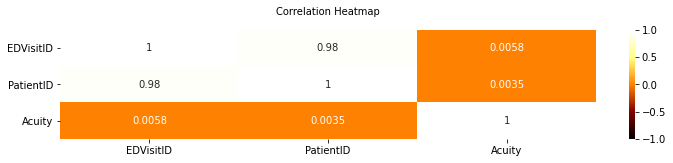

In [19]:
# Create a correlation heatmap
plt.figure(figsize=(12,2))
heatmap = sns.heatmap(df_EDV.corr(), vmin=-1, vmax=1, annot=True, cmap="afmhot")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10}, pad=15)

plt.show()

### 49.Plot a graph by counting the no. of patients in each department.

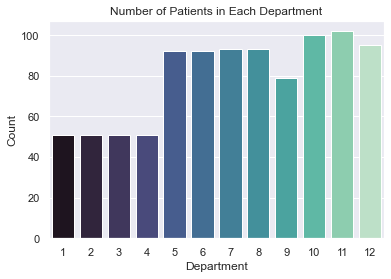

In [23]:
# Create a countplot
sns.set(style="darkgrid")
sns.countplot(data =df_AV, x='VisitDepartmentID', palette="mako")
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Number of Patients in Each Department")
plt.show()

### 50.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.

In [26]:
#selecting patient details with conditions
df_new_EDV=df_EDV.loc[((df_EDV['ReasonForVisit'] == 'Migraine') |  (df_EDV['ReasonForVisit'] == 'Pneumonia')) &  (df_EDV['Acuity']  >=2)]
#print(df_new_EDV)
## creating new dataframe with patientID and age
df_new_EDV= df_new_EDV[['PatientID','ReasonForVisit', 'Acuity' ]]
print(df_new_EDV)


      PatientID ReasonForVisit  Acuity
1            12       Migraine       2
3            14       Migraine       3
11           29      Pneumonia       2
12           30      Pneumonia       3
13           31      Pneumonia       4
...         ...            ...     ...
1107        773       Migraine       2
1150        850       Migraine       2
1152        852       Migraine       2
1160        868       Migraine       2
1162        870       Migraine       2

[215 rows x 3 columns]


### 51.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.

In [28]:
x = input("Enter the reason for visit: ")
print(x)

temp_df = df_EDV.loc[(df_EDV['ReasonForVisit'] == x) ]

print("%s%s" % ('Patients admitted with ' + x + ' are : ',  len(temp_df.index)))

Enter the reason for visit: Migraine
Migraine
Patients admitted with Migraine are : 156


### 52.Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.